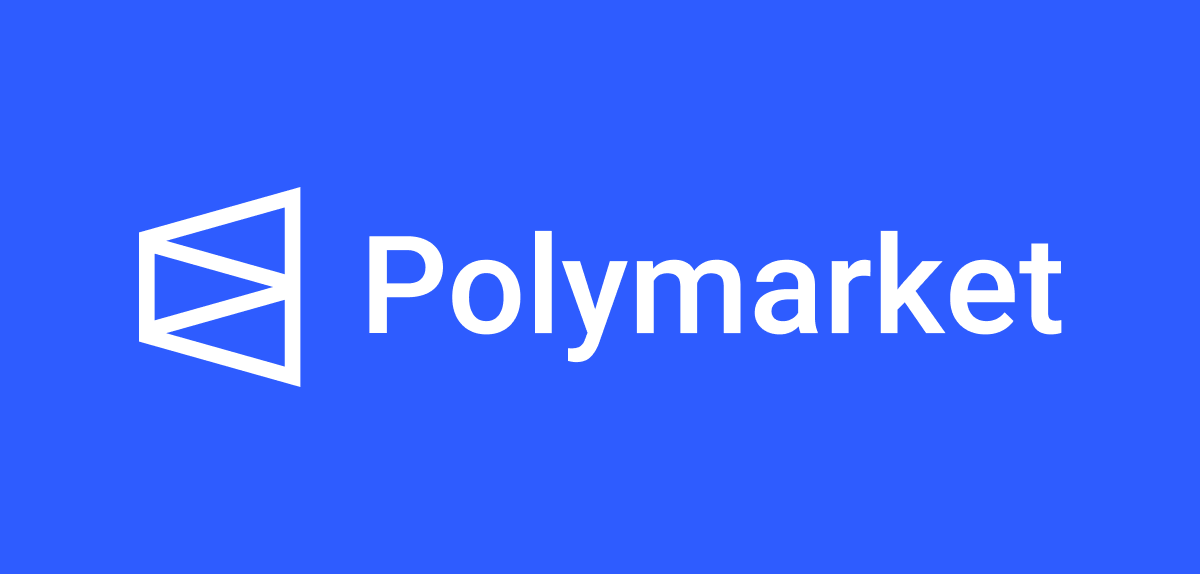

Step to build a model of chess:
1) Read the data that a downloaded, the format is in PGN, so the idea is pass that format to PD
2) Check the data

In [4]:
curl https://api.openai.com/v1/chat/completions -H "Content-Type: application/json" -H "Authorization: Bearer " -d "{ \"messages\": [ { \"role\": \"system\", \"content\": \"You are a test assistant.\" }, { \"role\": \"user\", \"content\": \"Testing. Just say hi and nothing else.\" } ], \"model\": \"gpt-4o-mini\" }"

SyntaxError: invalid syntax (3483132822.py, line 1)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 1. Cargar los datos
data_chess = pd.read_csv(r'/home/santiagogr/polymarket/Model_machine/matches_data.csv')


/tmp/ipykernel_4263/2975237371.py:8: DtypeWarning: Columns (3,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_chess = pd.read_csv(r'/home/santiagogr/polymarket/Model_machine/matches_data.csv')


In [7]:

# 2. Convertir fechas
data_chess['Date'] = pd.to_datetime(data_chess['Date'], errors='coerce')

# 3. Convertir resultados a valores numéricos
result_map = {'0-1': -1, '1/2-1/2': 0, '1-0': 1}
data_chess['Result'] = data_chess['Result'].map(result_map)

# 4. Filtrar partidas con Elo > 2500 y eliminar partidas de máquinas
data_chess = data_chess[
    (data_chess['WhiteElo'] > 2500) & 
    (data_chess['BlackElo'] > 2500) &
    (data_chess['WhiteElo'] <= 3000) & 
    (data_chess['BlackElo'] <= 3000)
]


In [ ]:

# 5. Crear características básicas
data_chess['Elo_Difference'] = data_chess['WhiteElo'] - data_chess['BlackElo']
data_chess['Expected_Score'] = 1 / (1 + 10**((data_chess['BlackElo'] - data_chess['WhiteElo'])/400))


/tmp/ipykernel_4263/109575284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chess['Elo_Difference'] = data_chess['WhiteElo'] - data_chess['BlackElo']
/tmp/ipykernel_4263/109575284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chess['Expected_Score'] = 1 / (1 + 10**((data_chess['BlackElo'] - data_chess['WhiteElo'])/400))
/tmp/ipykernel_4263/109575284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [13]:
data_chess

,Event,Site,Date,Round,White,Black,Result,WhiteTitle,BlackTitle,WhiteElo,BlackElo,ECO,Opening,Variation,WhiteFideId,BlackFideId,EventDate,Elo_Difference,Expected_Score,White_Advantage
92,89th Hastings Masters 2013-14,Hastings ENG,2014-01-02,6.1,"Mchedlishvili,M","Pert,N",0.0,GM,GM,2649.0,2554.0,D17,QGD Slav,Krause attack,13600966.0,403989.0,2013.12.28,95.0,0.633408,1
93,89th Hastings Masters 2013-14,Hastings ENG,2014-01-02,6.2,Ma Qun,"Tomczak,J",0.0,GM,GM,2595.0,2569.0,C09,French,"Tarrasch, open variation, main line",8603154.0,1124668.0,2013.12.28,26.0,0.537347,1
138,89th Hastings Masters 2013-14,Hastings ENG,2014-01-03,7.1,"Hawkins,Jo","Mchedlishvili,M",0.0,IM,GM,2512.0,2649.0,D97,Gruenfeld,"Russian, Prins variation",412686.0,13600966.0,2013.12.28,-137.0,0.312462,1
140,89th Hastings Masters 2013-14,Hastings ENG,2014-01-03,7.3,"Pert,N",Ma Qun,0.0,GM,GM,2554.0,2595.0,D19,QGD Slav,Dutch variation,403989.0,8603154.0,2013.12.28,-41.0,0.441269,1
184,89th Hastings Masters 2013-14,Hastings ENG,2014-01-04,8.1,"Mchedlishvili,M","Khenkin,I",0.0,GM,GM,2649.0,2598.0,D38,QGD,Ragozin variation,13600966.0,4659600.0,2013.12.28,51.0,0.572872,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920664,Chinese Teams 2013,Tianjin CHN,2013-12-24,22.4,Wan Yunguo,"Ponomariov,R",0.0,IM,GM,2516.0,2731.0,B90,Sicilian,"Najdorf, Byrne (English) attack",8603189.0,14103320.0,2013.04.30,-215.0,0.224847,1
2920665,Chinese Teams 2013,Tianjin CHN,2013-12-24,22.4,Zhao Zong Yuan,Wei Yi,1.0,GM,GM,2579.0,2604.0,B70,Sicilian,dragon variation,3202534.0,8603405.0,2013.04.30,-25.0,0.464084,1
2920666,Chinese Teams 2013,Tianjin CHN,2013-12-24,22.4,Zhang Pengxiang,Yu Ruiyuan,0.0,GM,GM,2574.0,2553.0,B01,"Scandinavian defence, Gruenfeld variation",NaN,8600970.0,8603090.0,2013.04.30,21.0,0.530185,1
2920670,Chinese Teams 2013,Tianjin CHN,2013-12-24,22.5,Wang Yue,"Motylev,A",0.0,GM,GM,2725.0,2645.0,A07,Reti,"King's Indian attack, Keres variation",8601429.0,4121830.0,2013.04.30,80.0,0.613137,1


In [ ]:

# 6. Calcular estadísticas históricas
white_stats = data_chess.groupby('White')['Result'].agg(['count', 'sum']).rename(columns={'count': 'white_games', 'sum': 'white_wins'})
white_stats['white_draws'] = data_chess.groupby('White')['Result'].apply(lambda x: (x == 0).sum())
white_stats['white_winrate'] = (white_stats['white_wins'] + 0.5 * white_stats['white_draws']) / white_stats['white_games']

black_stats = data_chess.groupby('Black')['Result'].agg(['count', 'sum']).rename(columns={'count': 'black_games', 'sum': 'black_wins'})
black_stats['black_draws'] = data_chess.groupby('Black')['Result'].apply(lambda x: (x == 0).sum())
black_stats['black_winrate'] = (black_stats['black_wins'] + 0.5 * black_stats['black_draws']) / black_stats['black_games']

# Agregar estadísticas a cada partida
data_chess = data_chess.merge(white_stats[['white_winrate']], left_on='White', right_index=True, how='left')
data_chess = data_chess.merge(black_stats[['black_winrate']], left_on='Black', right_index=True, how='left')


In [ ]:

# 7. Calcular forma reciente
data_chess = data_chess.sort_values('Date')
data_chess['recent_white_form'] = data_chess.groupby('White')['Result'].transform(lambda x: x.rolling(10, min_periods=1).mean())
data_chess['recent_black_form'] = data_chess.groupby('Black')['Result'].transform(lambda x: x.rolling(10, min_periods=1).mean())


In [ ]:

# 8. Limpiar valores nulos
features = [
    'Elo_Difference',
    'Expected_Score',
    'White_Advantage',
    'white_winrate',
    'black_winrate',
    'recent_white_form',
    'recent_black_form'
]

data_chess = data_chess.dropna(subset=features + ['Result'])


In [ ]:

# 9. Preparar datos para el modelo
X = data_chess[features]
y = data_chess['Result']

# 10. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 12. Entrenar modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 13. Función para predecir
def predict_chess_match(model, white_player, black_player, white_elo, black_elo):
    match_features = pd.DataFrame({
        'Elo_Difference': [white_elo - black_elo],
        'Expected_Score': [1 / (1 + 10**((black_elo - white_elo)/400))],
        'White_Advantage': [1],
        'white_winrate': [data_chess[data_chess['White'] == white_player]['white_winrate'].mean()],
        'black_winrate': [data_chess[data_chess['Black'] == black_player]['black_winrate'].mean()],
        'recent_white_form': [data_chess[data_chess['White'] == white_player]['recent_white_form'].iloc[-1]],
        'recent_black_form': [data_chess[data_chess['Black'] == black_player]['recent_black_form'].iloc[-1]]
    })
    
    match_features_scaled = scaler.transform(match_features)
    probs = model.predict_proba(match_features_scaled)[0]
    
    return {
        'Victoria Blancas': probs[2],
        'Empate': probs[1],
        'Victoria Negras': probs[0]
    }

# 14. Evaluación del modelo
print("\nEvaluación del modelo:")
print(f"Precisión en conjunto de prueba: {rf_model.score(X_test_scaled, y_test):.3f}")

# 15. Importancia de características
importancia = pd.DataFrame({
    'caracteristica': features,
    'importancia': rf_model.feature_importances_
})
print("\nImportancia de las características:")
print(importancia.sort_values('importancia', ascending=False))

# 16. Ejemplo de predicción
ejemplo_jugadores = {
    'white_player': data_chess['White'].iloc[0],
    'black_player': data_chess['Black'].iloc[0],
    'white_elo': 2700,
    'black_elo': 2650
}

prediccion = predict_chess_match(
    rf_model,
    ejemplo_jugadores['white_player'],
    ejemplo_jugadores['black_player'],
    ejemplo_jugadores['white_elo'],
    ejemplo_jugadores['black_elo']
)

print("\nPredicción de ejemplo:")
for resultado, prob in prediccion.items():
    print(f"{resultado}: {prob:.2%}")

# 17. Guardar algunas estadísticas útiles
print("\nEstadísticas del dataset:")
print(f"Número total de partidas: {len(data_chess)}")
print("\nDistribución de resultados:")
print(data_chess['Result'].value_counts(normalize=True))

In [5]:
data_chess

,Event,Site,Date,Round,White,Black,Result,WhiteTitle,BlackTitle,WhiteElo,...,WhiteFideId,BlackFideId,EventDate,Elo_Difference,Expected_Score,White_Advantage,white_winrate,black_winrate,recent_white_form,recent_black_form
2689073,TCh-CAT 2012,Catalunya ESP,2012-02-25,5.1,"Spraggett,K","Gonzalez Garcia,J2",-1.0,GM,GM,2584.0,...,2600013.0,5101174.0,2012.01.28,55.0,0.578497,1,0.062500,0.450000,-1.0,-1.0
2689106,TCh-CAT 2012,Catalunya ESP,2012-04-21,11.1,"Gonzalez Garcia,J2","Narciso Dublan,M",0.0,GM,GM,2529.0,...,5101174.0,2201500.0,2012.01.28,-5.0,0.492805,1,0.318182,0.489691,0.0,0.0
2688912,Coupe de France 2012,Bois-Colombes FRA,2012-05-19,1,"Edouard,R","Feller,S",0.0,GM,GM,2625.0,...,633429.0,634654.0,2012.05.19,-15.0,0.478427,1,0.235646,0.454545,0.0,0.0
2688929,Coupe de France 2012,Bois-Colombes FRA,2012-05-20,2,"Magem Badals,J","Gozzoli,Y",0.0,GM,GM,2549.0,...,2200074.0,616915.0,2012.05.19,-2.0,0.497122,1,0.365385,0.308219,0.0,0.0
2687600,5th Mayors Cup 2012,Mumbai IND,2012-06-10,6.2,"Aleksandrov,A","Gomez,Joh",1.0,GM,GM,2606.0,...,13500139.0,5201381.0,2012.06.07,99.0,0.638738,1,0.231118,0.442308,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686700,Weissenhaus Play-In Swiss,chess.com INT,2025-01-06,5.0,"Moroni,L","Lazavik,Denis",-1.0,GM,GM,2545.0,...,865834.0,13515110.0,2025.01.06,-33.0,0.452651,1,0.083141,0.079027,0.1,-0.4
1324787,EE May Blitz Open 2021,Europe-Echecs INT,NaT,10,"Deac,Bogdan-Daniel","Tabatabaei,M",0.0,GM,GM,2627.0,...,1226380.0,12521213.0,2021.05.09,14.0,0.520137,1,0.337325,0.200000,0.2,0.0
1324788,EE May Blitz Open 2021,Europe-Echecs INT,NaT,10,"Keymer,Vincent","Jobava,Ba",0.0,GM,GM,2591.0,...,12940690.0,13601520.0,2021.05.09,-12.0,0.482737,1,0.286008,0.138484,-0.1,-0.1
1324789,EE May Blitz Open 2021,Europe-Echecs INT,NaT,10,"Santos Latasa,J","Kamsky,G",0.0,GM,GM,2608.0,...,2293307.0,2000024.0,2021.05.09,-57.0,0.418699,1,0.343545,0.280876,-0.3,0.1
